Saving cleaned_maternal_health.csv to cleaned_maternal_health.csv


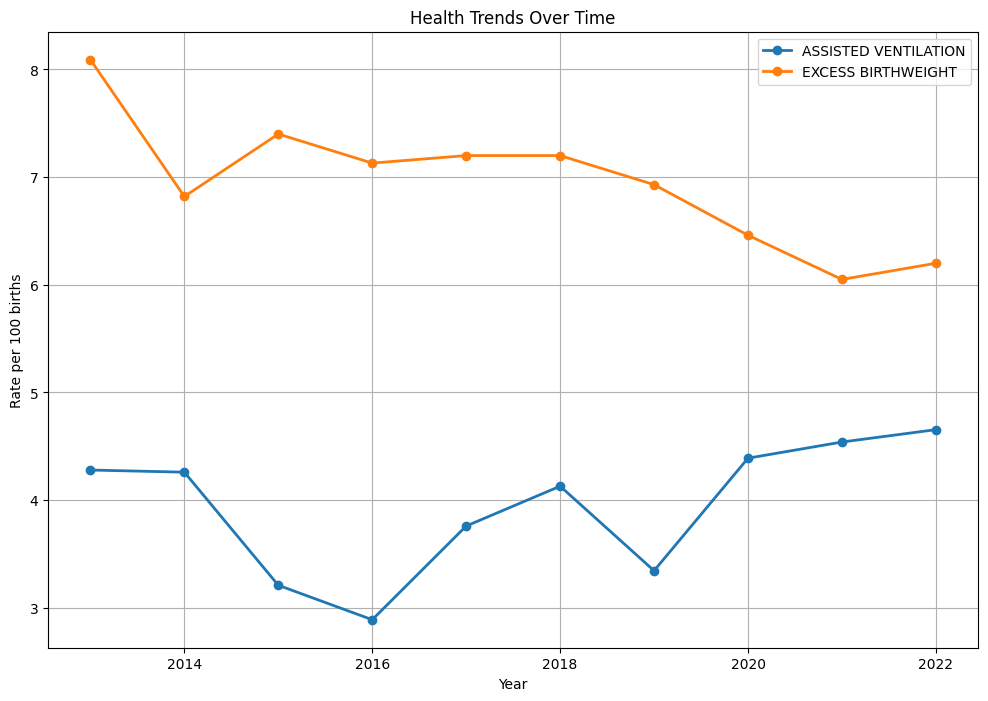

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

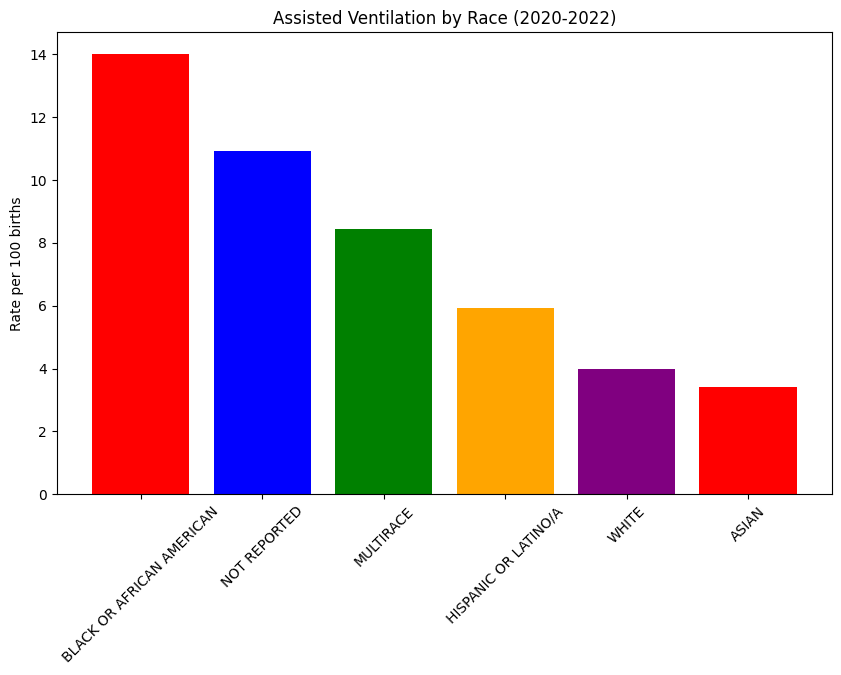

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

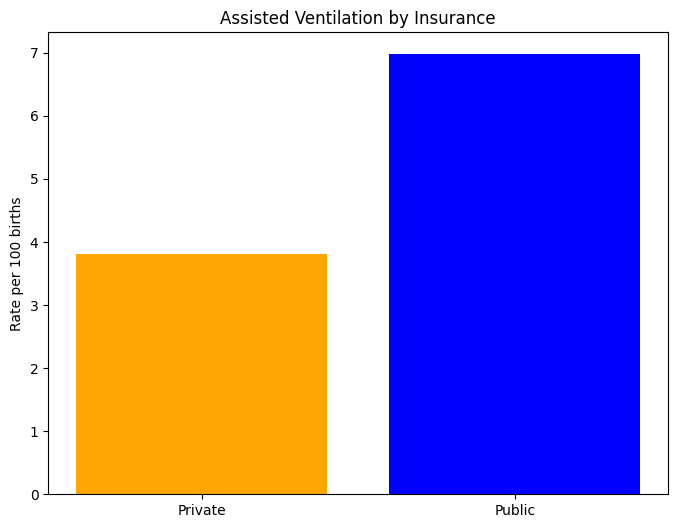

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All charts downloaded!


In [6]:
# Upload and analyze maternal health data
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# Upload your file
uploaded = files.upload()

# Load data
df = pd.read_csv(list(uploaded.keys())[0])

# 1. Health trends over time
plt.figure(figsize=(12, 8))
annual_data = df[df['period'].str.isnumeric() & (df['race_ethnicity'] == 'ALL')]
for condition in ['ASSISTED VENTILATION', 'EXCESS BIRTHWEIGHT']:
    condition_data = annual_data[annual_data['health_condition_data_source'].str.contains(condition)]
    if not condition_data.empty:
        yearly_trends = condition_data.groupby('year')['outcome_rate_pct'].mean()
        plt.plot(yearly_trends.index, yearly_trends.values, marker='o', label=condition, linewidth=2)
plt.title('Health Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Rate per 100 births')
plt.legend()
plt.grid(True)
plt.savefig('trends.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('trends.png')

# 2. Racial disparities
plt.figure(figsize=(10, 6))
race_data = df[(df['period'] == '2020-2022') & (df['race_ethnicity'] != 'ALL')]
vent_race = race_data[race_data['health_condition_data_source'].str.contains('ASSISTED VENTILATION')]
if not vent_race.empty:
    race_rates = vent_race.groupby('race_ethnicity')['outcome_rate_pct'].mean().sort_values(ascending=False)
    plt.bar(race_rates.index, race_rates.values, color=['red', 'blue', 'green', 'orange', 'purple'])
    plt.title('Assisted Ventilation by Race (2020-2022)')
    plt.ylabel('Rate per 100 births')
    plt.xticks(rotation=45)
plt.savefig('racial_disparities.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('racial_disparities.png')

# 3. Insurance disparities
plt.figure(figsize=(8, 6))
insurance_data = df[(df['period'] == '2020-2022') & (df['insurance'].isin(['Public', 'Private']))]
vent_insurance = insurance_data[insurance_data['health_condition_data_source'].str.contains('ASSISTED VENTILATION')]
if not vent_insurance.empty:
    insurance_rates = vent_insurance.groupby('insurance')['outcome_rate_pct'].mean()
    plt.bar(insurance_rates.index, insurance_rates.values, color=['orange', 'blue'])
    plt.title('Assisted Ventilation by Insurance')
    plt.ylabel('Rate per 100 births')
plt.savefig('insurance.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('insurance.png')

print("All charts downloaded!")